<a href="https://colab.research.google.com/github/2570KhanhHuyen/Ung-dung-luat-ket-hop-trong-phan-tich-gio-hang-/blob/main/Group_7_48K21_2_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Tiền xử lý dữ liệu

In [ ]:
#Đọc data từ file csv. In 10 dòng đầu tiên của data
import pandas as pd
df = pd.read_csv('dataset.csv')
print(df.head(10))

   Transaction           Item            date_time period_day weekday_weekend
0            1          Bread  2016-10-30 09:58:11    morning         weekend
1            2   Scandinavian  2016-10-30 10:05:34    morning         weekend
2            2   Scandinavian  2016-10-30 10:05:34    morning         weekend
3            3  Hot chocolate  2016-10-30 10:07:57    morning         weekend
4            3            Jam  2016-10-30 10:07:57    morning         weekend
5            3        Cookies  2016-10-30 10:07:57    morning         weekend
6            4         Muffin  2016-10-30 10:08:41    morning         weekend
7            5         Coffee  2016-10-30 10:13:03    morning         weekend
8            5         Pastry  2016-10-30 10:13:03    morning         weekend
9            5          Bread  2016-10-30 10:13:03    morning         weekend


In [ ]:
#Kiểm tra kích thước của data.Kiểm tra thông tin của data
print('Thông tin về dữ liệu:')
df.shape
df.info()

Thông tin về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      21293 non-null  int64 
 1   Item             21293 non-null  object
 2   date_time        21293 non-null  object
 3   period_day       21293 non-null  object
 4   weekday_weekend  21293 non-null  object
dtypes: int64(1), object(4)
memory usage: 831.9+ KB


In [ ]:
#Kiểm tra số lượng giá trị null trong data
df.isnull().sum()


Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [ ]:
#Số lượng mặt hàng trong cửa hàng
print('Số lượng mặt hàng trong cửa hàng: ', df['Item'].nunique())
print( '\n', df['Item'].unique())

Số lượng mặt hàng trong cửa hàng:  97

 ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'coffee' 'Tea' 'NONE' 'Tartine' 'Basket'
 'Mineral water' 'Farm House' 'Fudge' 'Juice' 'cofee'
 "Ella's Kitchen Pouches" 'Victorian Sponge' 'Frittata'
 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies' 'Cake'
 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot' 'Focaccia'
 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche' 'Honey'
 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chick

Problem:
    -Có item = NONE
    -Định dạng không thống nhất: có item viết hoa chữ cái đầu chữ sau viết thường nhưng có item lại viết hoa chữ cái sau (ví dụ: 'The BART'), hoặc viết thường(ví dụ: coffee)
    -Item coffee được ghi là Coffee, cofee, coffee

In [ ]:
# Item với giá trị là NONE
print(df[df['Item']=='NONE'])

       Transaction  Item            date_time period_day weekday_weekend
26              11  NONE  2016-10-30 10:27:21    morning         weekend
38              15  NONE  2016-10-30 10:34:36    morning         weekend
39              15  NONE  2016-10-30 10:34:36    morning         weekend
66              29  NONE  2016-10-30 11:05:30    morning         weekend
80              37  NONE  2016-10-30 11:37:10    morning         weekend
...            ...   ...                  ...        ...             ...
21108         9590  NONE  2017-04-08 11:54:22    morning         weekend
21122         9599  NONE  2017-04-08 12:58:25  afternoon         weekend
21254         9666  NONE  2017-04-09 12:01:07  afternoon         weekend
21255         9667  NONE  2017-04-09 12:04:13  afternoon         weekend
21266         9672  NONE  2017-04-09 12:31:28  afternoon         weekend

[786 rows x 5 columns]


In [ ]:
# Đếm số lượng mặt hàng duy nhất trong cửa hàng. In ra top 10 mặt hàng được mua nhiều nhất
df_counts = df["Item"].value_counts()
#Top 10 mặt hàng được mua nhiều nhất
print("Top 10 mặt hàng được mua nhiều nhất")
df_counts.head(10)

Top 10 mặt hàng được mua nhiều nhất


Item
Coffee           4388
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
cofee             549
Name: count, dtype: int64

In [ ]:
#Loại bỏ các mặt hàng có giá trị là NONE
df_modified = df[df["Item"] != "NONE"].reset_index(drop=True)
print('Số bản ghi sau khi loại bỏ item ="NONE" :',len(df_modified))
print(df_modified.head(10))

Số bản ghi sau khi loại bỏ item ="NONE" : 20507
   Transaction           Item            date_time period_day weekday_weekend
0            1          Bread  2016-10-30 09:58:11    morning         weekend
1            2   Scandinavian  2016-10-30 10:05:34    morning         weekend
2            2   Scandinavian  2016-10-30 10:05:34    morning         weekend
3            3  Hot chocolate  2016-10-30 10:07:57    morning         weekend
4            3            Jam  2016-10-30 10:07:57    morning         weekend
5            3        Cookies  2016-10-30 10:07:57    morning         weekend
6            4         Muffin  2016-10-30 10:08:41    morning         weekend
7            5         Coffee  2016-10-30 10:13:03    morning         weekend
8            5         Pastry  2016-10-30 10:13:03    morning         weekend
9            5          Bread  2016-10-30 10:13:03    morning         weekend


In [ ]:
#Có một số item không viết hoa, một số khác viết hoa chữ cái đầu. --> chuyển về chữ viết thường
df_modified['Item'] = df_modified['Item'].str.lower()
print(df_modified.head())

   Transaction           Item            date_time period_day weekday_weekend
0            1          bread  2016-10-30 09:58:11    morning         weekend
1            2   scandinavian  2016-10-30 10:05:34    morning         weekend
2            2   scandinavian  2016-10-30 10:05:34    morning         weekend
3            3  hot chocolate  2016-10-30 10:07:57    morning         weekend
4            3            jam  2016-10-30 10:07:57    morning         weekend


In [ ]:
#In ra item có tên là "cofee"
print(df[df['Item']=='cofee'])

       Transaction   Item            date_time period_day weekday_weekend
87              40  cofee  2016-10-30 11:55:51    morning         weekend
96              45  cofee  2016-10-30 12:08:36  afternoon         weekend
106             49  cofee  2016-10-30 12:23:01  afternoon         weekend
194             88  cofee  2016-10-31 09:16:01    morning         weekday
214             97  cofee  2016-10-31 09:51:11    morning         weekday
...            ...    ...                  ...        ...             ...
21095         9587  cofee  2017-04-08 11:28:11    morning         weekend
21125         9600  cofee  2017-04-08 13:08:16  afternoon         weekend
21167         9617  cofee  2017-04-08 15:03:00  afternoon         weekend
21191         9628  cofee  2017-04-08 16:06:48  afternoon         weekend
21196         9630  cofee  2017-04-08 16:16:03  afternoon         weekend

[549 rows x 5 columns]


In [ ]:
# Chuyển định dạng các mặt hàng cofee -> coffee
df_modified ['Item'] = df_modified['Item'].replace('cofee', 'coffee')


In [ ]:
#Số mặt hàng trong cửa hàng sau khi tiền xử lý dữ liệu
print('Số lượng mặt hàng trong cửa hàng: ', df_modified['Item'].nunique())
print( '\n', df_modified['Item'].unique())

Số lượng mặt hàng trong cửa hàng:  94

 ['bread' 'scandinavian' 'hot chocolate' 'jam' 'cookies' 'muffin' 'coffee'
 'pastry' 'medialuna' 'tea' 'tartine' 'basket' 'mineral water'
 'farm house' 'fudge' 'juice' "ella's kitchen pouches" 'victorian sponge'
 'frittata' 'hearty & seasonal' 'soup' 'pick and mix bowls' 'smoothies'
 'cake' 'mighty protein' 'chicken sand' 'coke' 'my-5 fruit shoot'
 'focaccia' 'sandwich' 'alfajores' 'eggs' 'brownie' 'dulce de leche'
 'honey' 'the bart' 'granola' 'fairy doors' 'empanadas' 'keeping it local'
 'art tray' 'bowl nic pitt' 'bread pudding' 'adjustment' 'truffles'
 'chimichurri oil' 'bacon' 'spread' 'kids biscuit' 'siblings'
 'caramel bites' 'jammie dodgers' 'tiffin' 'olum & polenta' 'polenta'
 'the nomad' 'hack the stack' 'bakewell' 'lemon and coconut' 'toast'
 'scone' 'crepes' 'vegan mincepie' 'bare popcorn' 'muesli' 'crisps'
 'pintxos' 'gingerbread syrup' 'panatone' 'brioche and salami'
 'afternoon with the baker' 'salad' 'chicken stew' 'spanish brunch'

In [ ]:
print('Số bản ghi sau tiền xử lý dữ liệu :',len(df_modified))

Số bản ghi sau tiền xử lý dữ liệu : 20507


THÊM CỘT (DÙNG CHO TRỰC QUAN HOÁ)

In [ ]:
#Chuyển đổi kiểu dữ liệu của cột date_time từ object sang datetime
df_modified['date_time'] = pd.to_datetime(df_modified['date_time'])
#Tạo cột mới là day_of_week và hours từ cột date_time
df_modified['day_of_week'] = df_modified['date_time'].dt.dayofweek
df_modified['hours'] = df_modified['date_time'].dt.hour
print(df_modified.head())



   Transaction           Item           date_time period_day weekday_weekend  \
0            1          bread 2016-10-30 09:58:11    morning         weekend   
1            2   scandinavian 2016-10-30 10:05:34    morning         weekend   
2            2   scandinavian 2016-10-30 10:05:34    morning         weekend   
3            3  hot chocolate 2016-10-30 10:07:57    morning         weekend   
4            3            jam 2016-10-30 10:07:57    morning         weekend   

   day_of_week  hours  
0            6      9  
1            6     10  
2            6     10  
3            6     10  
4            6     10  


Trực quan hoá (khám phá dữ liệu)

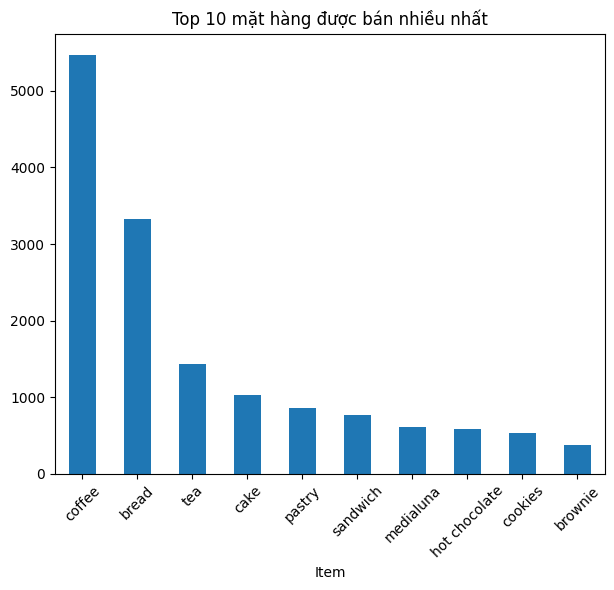

In [ ]:
# Biểu đồ top 10 mặt hàng được bán nhiều nhất
item_counts = df_modified['Item'].value_counts()
top_items = item_counts.head(10)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 2)
top_items.plot(kind='bar')
plt.title('Top 10 mặt hàng được bán nhiều nhất')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


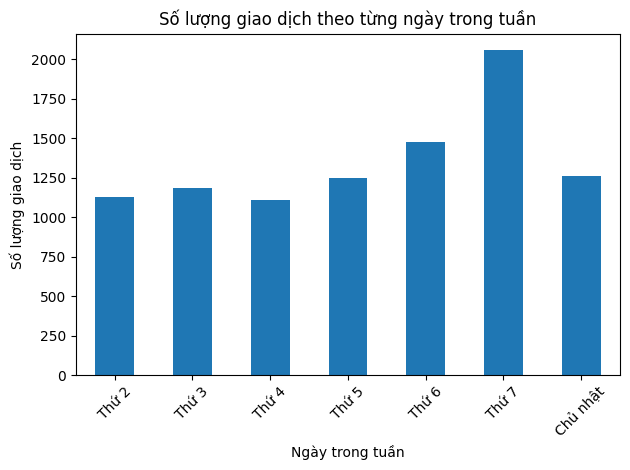

In [ ]:
# Vẽ biểu đồ số lượng giao dịch ra theo từng ngày trong tuần
df_modified.groupby('day_of_week')['Transaction'].nunique().plot(
    kind='bar',
    title='Số lượng giao dịch theo từng ngày trong tuần',
    xlabel='Ngày trong tuần',
    ylabel='Số lượng giao dịch',
)

plt.xticks(ticks=range(7), labels=["Thứ 2", "Thứ 3", "Thứ 4", "Thứ 5", "Thứ 6", "Thứ 7", "Chủ nhật"], rotation=45)
plt.tight_layout()
plt.show()


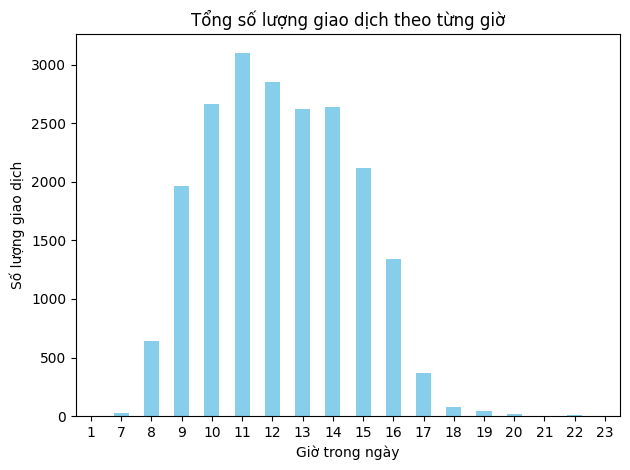

In [ ]:
# Vẽ biểu đồ tổng số lượng giao dịch theo từng giờ
df_modified.groupby('hours')['Transaction'].count().plot(
    kind='bar',
    title='Tổng số lượng giao dịch theo từng giờ',
    xlabel='Giờ trong ngày',
    ylabel='Số lượng giao dịch',
    color='skyblue'
)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

MÃ HOÁ DỮ LIỆU

In [ ]:
#import thư viện cho luật kết hợp
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [ ]:
#Nhóm các sản phẩm lại theo từng giao dịch (transaction)
transactions = df_modified.groupby('Transaction')['Item'].apply(list).tolist()
te = TransactionEncoder()
#Chuyển từ danh sách các itemsets sang ma trận nhị phân
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.head(10)


,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


TÌM TẬP THƯỜNG XUYÊN

In [ ]:
#Chọn ngưỡng min_support = 0.01 và sắp xếp theo thứ tự giảm dần của support
frequentItems= apriori(df_encoded, use_colnames=True, min_support=0.01)
frequentItems.sort_values("support", ascending=False)

,support,itemsets
6,0.478394,(coffee)
2,0.327205,(bread)
26,0.142631,(tea)
4,0.103856,(cake)
34,0.090016,"(coffee, bread)"
...,...,...
11,0.010565,(hearty & seasonal)
20,0.010460,(salad)
30,0.010354,"(alfajores, bread)"
58,0.010037,"(coffee, cake, bread)"


In [ ]:
#Tập thường xuyên
frequentItems["antecedent_len"] = frequentItems["itemsets"].apply(lambda x: len(x))
frequentItems_sorted = frequentItems.sort_values(by=["antecedent_len", "support"], ascending=False)
print(frequentItems_sorted)


     support                 itemsets  antecedent_len
59  0.011199  (coffee, pastry, bread)               3
58  0.010037    (coffee, cake, bread)               3
60  0.010037      (coffee, tea, cake)               3
34  0.090016          (coffee, bread)               2
42  0.054728           (coffee, cake)               2
..       ...                      ...             ...
17  0.014157          (mineral water)               1
14  0.013207         (jammie dodgers)               1
5   0.012995           (chicken stew)               1
11  0.010565      (hearty & seasonal)               1
20  0.010460                  (salad)               1

[61 rows x 3 columns]


In [ ]:
#Tập thường xuyên có 2-itemset trở lên
frequentItems["antecedent_len"] = frequentItems["itemsets"].apply(lambda x: len(x))
frequentItems[frequentItems["antecedent_len"]>1].sort_values(by=["antecedent_len","support"], ascending=False)



,support,itemsets,antecedent_len
59,0.011199,"(coffee, pastry, bread)",3
58,0.010037,"(coffee, cake, bread)",3
60,0.010037,"(coffee, tea, cake)",3
34,0.090016,"(coffee, bread)",2
42,0.054728,"(coffee, cake)",2
55,0.049868,"(coffee, tea)",2
50,0.047544,"(coffee, pastry)",2
51,0.038246,"(coffee, sandwich)",2
48,0.035182,"(coffee, medialuna)",2
46,0.029583,"(coffee, hot chocolate)",2


Tạo luật kết hợp

In [ ]:
rules = association_rules(frequentItems, metric="confidence", min_threshold=0.2)
rules.sort_values('confidence', ascending = False, inplace=True)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
24,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936
22,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,1.0,0.002189,1.300235,0.204851,0.022406,0.230908,0.310792
16,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,1.0,0.005614,1.210871,0.170091,0.069665,0.174148,0.321387
18,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,1.0,0.006351,1.164682,0.146161,0.091968,0.141396,0.325764
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,1.0,0.002264,1.135648,0.119574,0.039693,0.119446,0.290888
15,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,1.0,0.002154,1.119919,0.108738,0.041507,0.107078,0.288656
19,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,1.0,0.003877,1.115384,0.109205,0.074701,0.103448,0.306150
11,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.102840,0.103745,0.093105,0.320679
20,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,1.0,0.001539,1.093366,0.088224,0.036507,0.085393,0.280350
13,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,1.0,0.002179,1.083174,0.081700,0.055905,0.076787,0.288707


In [ ]:
rules.sort_values('lift', ascending = False, inplace=True)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
10,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936
9,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,1.0,0.002189,1.300235,0.204851,0.022406,0.230908,0.310792
5,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,1.0,0.005614,1.210871,0.170091,0.069665,0.174148,0.321387
6,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,1.0,0.006351,1.164682,0.146161,0.091968,0.141396,0.325764
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,1.0,0.002264,1.135648,0.119574,0.039693,0.119446,0.290888
4,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,1.0,0.002154,1.119919,0.108738,0.041507,0.107078,0.288656
7,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,1.0,0.003877,1.115384,0.109205,0.074701,0.103448,0.306150
1,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.102840,0.103745,0.093105,0.320679
8,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,1.0,0.001539,1.093366,0.088224,0.036507,0.085393,0.280350
2,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,1.0,0.002179,1.083174,0.081700,0.055905,0.076787,0.288707


In [ ]:
#Lọc luật kết hợp có lift lớn hơn 1
rules[rules["lift"]>1].sort_values("lift",ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
10,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936
9,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,1.0,0.002189,1.300235,0.204851,0.022406,0.230908,0.310792
5,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,1.0,0.005614,1.210871,0.170091,0.069665,0.174148,0.321387
6,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,1.0,0.006351,1.164682,0.146161,0.091968,0.141396,0.325764
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,1.0,0.002264,1.135648,0.119574,0.039693,0.119446,0.290888
4,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,1.0,0.002154,1.119919,0.108738,0.041507,0.107078,0.288656
7,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,1.0,0.003877,1.115384,0.109205,0.074701,0.103448,0.306150
1,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.102840,0.103745,0.093105,0.320679
8,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,1.0,0.001539,1.093366,0.088224,0.036507,0.085393,0.280350
2,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,1.0,0.002179,1.083174,0.081700,0.055905,0.076787,0.288707


In [ ]:
index_names = rules['consequents'] == frozenset({'coffee'})
refinedRules = rules[~index_names].sort_values('lift', ascending=False)
refinedRules.drop(['leverage','conviction'], axis=1, inplace=True)
refinedRules = refinedRules.reset_index()
refinedRules

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,zhangs_metric,jaccard,certainty,kulczynski
0,29,"(coffee, tea)",(cake),0.049868,0.103856,0.010037,0.201271,1.937977,1.0,0.509401,0.069853,0.108705,0.148957
1,12,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,1.0,0.420538,0.106736,0.100611,0.197779
2,25,(sandwich),(tea),0.071844,0.142631,0.014369,0.200000,1.402222,1.0,0.309050,0.071806,0.066913,0.150370
3,8,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977,1.0,0.036980,0.075908,0.017011,0.213884
4,0,(alfajores),(bread),0.036344,0.327205,0.010354,0.284884,0.870657,1.0,-0.133570,0.029315,-0.062904,0.158264
5,7,(medialuna),(bread),0.061807,0.327205,0.016904,0.273504,0.835879,1.0,-0.173062,0.045429,-0.079818,0.162584
6,2,(brownie),(bread),0.040042,0.327205,0.010777,0.269129,0.822508,1.0,-0.183536,0.030231,-0.086321,0.151032
7,5,(cookies),(bread),0.054411,0.327205,0.014474,0.266019,0.813004,1.0,-0.195651,0.039424,-0.090943,0.155128
8,9,(sandwich),(bread),0.071844,0.327205,0.017010,0.236765,0.723596,1.0,-0.291561,0.044524,-0.134426,0.144375
9,27,"(coffee, pastry)",(bread),0.047544,0.327205,0.011199,0.235556,0.719901,1.0,-0.290026,0.030805,-0.136223,0.134891
